In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/XXXX/Downloads/archive/online_retail_II.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df.shape

(1067371, 8)

In [4]:
df.info

<bound method DataFrame.info of         Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                 InvoiceDate  Price  Customer ID       

In [5]:
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,1067371.0,9.938898,172.705794,-80995.00,1.00,3.0,10.00,80995.0
Price,1067371.0,4.649388,123.553059,-53594.36,1.25,2.1,4.15,38970.0
Customer ID,824364.0,15324.638504,1697.464450,12346.00,13975.00,15255.0,16797.00,18287.0


In [8]:
df.describe(include='O')

,Invoice,StockCode,Description,InvoiceDate,Country
count,1067371,1067371,1062989,1067371,1067371
unique,53628,5305,5698,47635,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-06 16:57:00,United Kingdom
freq,1350,5829,5918,1350,981330


In [9]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [10]:
df[df['Quantity']<0].head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia


In [11]:
df['Invoice']=df['Invoice'].astype('str')
df[df['Invoice'].str.match('^\\d{6}$')==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [12]:
df['Invoice'].str.replace('[0-9]',"",regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [13]:
df[df['Invoice'].str.startswith('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825443,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [14]:
df['StockCode']=df['StockCode'].astype('str')
df[(df['StockCode'].str.match("^\\d{5}$")==False) & (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$")==False)]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE',
       'DCGS0055', 'DCGS0074', 'DCGS0057', 'DCGS0073', 'DCGS0071',
       'DCGS0066P', 'DCGS0067', 'CRUK'], dtype=object)

In [15]:
df1=df.copy()

## Data Cleaning

In [16]:
df1['Invoice']=df1['Invoice'].astype('str')

In [17]:
mask=(
    df1['Invoice'].str.match("^\\d{6}$")== True
)

df1=df1[mask]
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [18]:
df1['StockCode']=df1['StockCode'].astype('str')

In [20]:
mask1=(
    (df1['StockCode'].str.match("^\\d{5}$")== True)
    | (df1['StockCode'].str.match("^\\d{5}[a-zA-Z]+$")==True)
    | (df1['StockCode'].str.match("^PADS$")== True)
)
df1=df1[mask1]
df1.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [23]:
df1.dropna(subset=['Customer ID'],inplace=True)

In [24]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,802711.0,13.336280,144.542222,1.0,2.00,5.00,12.00,80995.0
Price,802711.0,2.930474,4.275804,0.0,1.25,1.95,3.75,649.5
Customer ID,802711.0,15338.065410,1693.929085,12346.0,13988.00,15276.00,16809.00,18287.0


In [25]:
len(df1[df1['Price']==0])

62

In [26]:
df1['Price'].min()

np.float64(0.0)

In [29]:
len(df1)/len(df)

0.7520449778005961

<p style=color:lightblue>Dropped 25 percent of data during cleaning</p>

## Feature Engineering

In [30]:
df1['SalesLineTotal']=df1['Quantity'] * df1['Price']
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [42]:
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')

In [43]:
agg_df1=df1.groupby('Customer ID',as_index=False).agg(
    Monetary_Value=('SalesLineTotal','sum'),
    Frequency=('Invoice','nunique'),
    LastInvoicedate=('InvoiceDate','max')
)

agg_df1.head(3)

,Customer ID,Monetary_Value,Frequency,LastInvoicedate
0,12346.0,77352.96,3,2011-01-18 10:01:00
1,12347.0,5633.32,8,2011-12-07 15:52:00
2,12348.0,1658.40,5,2011-09-25 13:13:00


In [44]:
max_inv_date=agg_df1['LastInvoicedate'].max()
max_inv_date

Timestamp('2011-12-09 12:50:00')

In [46]:
#Recency time is the number of days after the last transaction
agg_df1['Recency']=(max_inv_date-agg_df1['LastInvoicedate']).dt.days
agg_df1.head()

,Customer ID,Monetary_Value,Frequency,LastInvoicedate,Recency
0,12346.0,77352.96,3,2011-01-18 10:01:00,325
1,12347.0,5633.32,8,2011-12-07 15:52:00,1
2,12348.0,1658.40,5,2011-09-25 13:13:00,74
3,12349.0,3678.69,3,2011-11-21 09:51:00,18
4,12350.0,294.40,1,2011-02-02 16:01:00,309


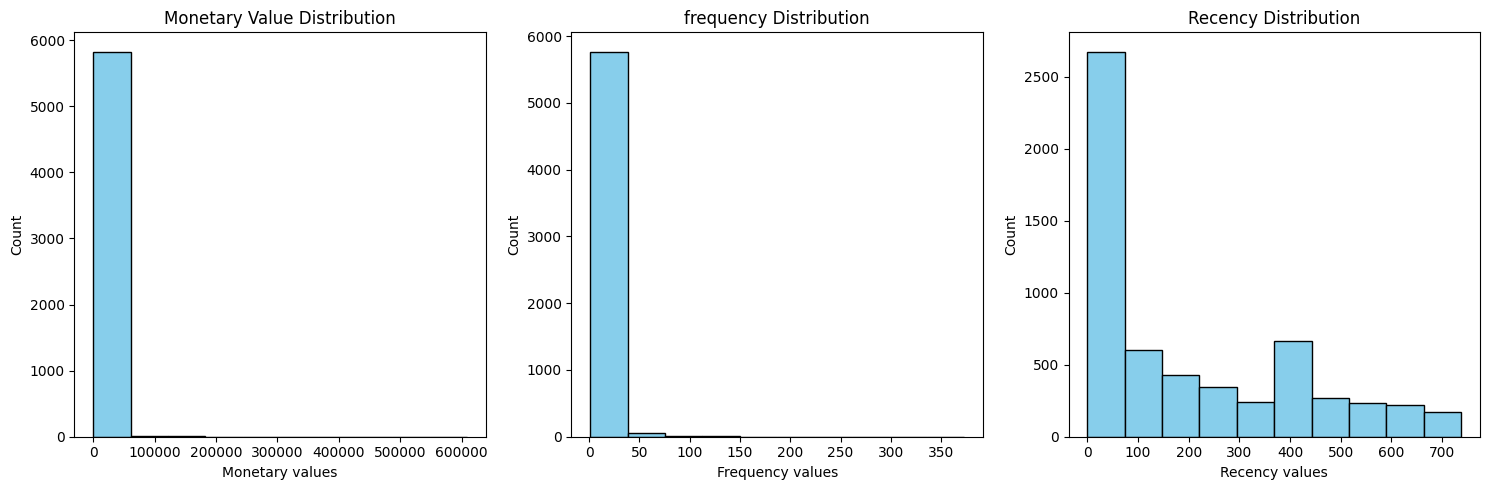

In [49]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(agg_df1['Monetary_Value'],bins=10,color='skyblue',edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary values')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(agg_df1['Frequency'],bins=10,color='skyblue',edgecolor='black')
plt.title('frequency Distribution')
plt.xlabel('Frequency values')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(agg_df1['Recency'],bins=10,color='skyblue',edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency values')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

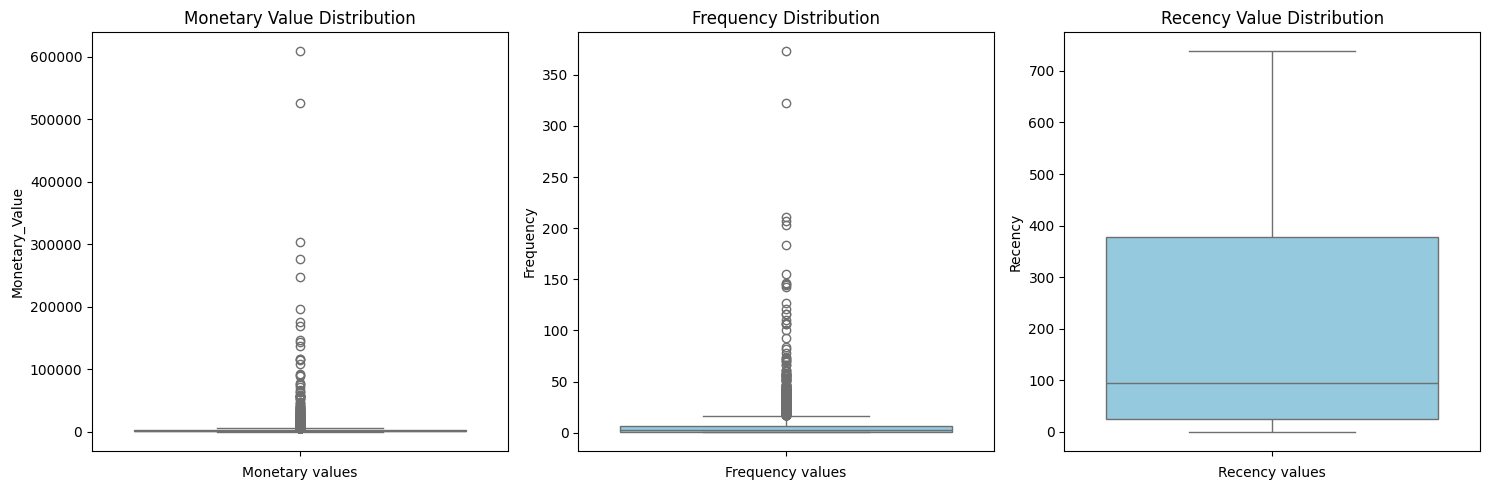

In [51]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(data=agg_df1['Monetary_Value'],color='skyblue')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary values')

plt.subplot(1,3,2)
sns.boxplot(data=agg_df1['Frequency'],color='skyblue')
plt.title('Frequency Distribution')
plt.xlabel('Frequency values')

plt.subplot(1,3,3)
sns.boxplot(data=agg_df1['Recency'],color='skyblue')
plt.title('Recency Value Distribution')
plt.xlabel('Recency values')

plt.tight_layout()
plt.show()


In [54]:
MQ1 = np.percentile(agg_df1['Monetary_Value'], 25, interpolation = 'midpoint') 
print('Q1 25 percentile of the given data is, ', MQ1)

Q1 25 percentile of the given data is,  344.90000000000003


In [62]:
MQ2=np.percentile(agg_df1['Monetary_Value'],75,interpolation='midpoint')
print('Q1 75 percentile of the given data is, ', MQ2)

Q1 75 percentile of the given data is,  2289.23


In [60]:
M_IQR=MQ2-MQ1

In [61]:
low_lim = MQ1 - 1.5 * M_IQR
up_lim = MQ2 + 1.5 * M_IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -2571.595
up_limit is 5205.725


In [64]:
monetary_outliers=agg_df1[(agg_df1['Monetary_Value']<low_lim)|(agg_df1['Monetary_Value']>up_lim)]
monetary_outliers

,Customer ID,Monetary_Value,Frequency,LastInvoicedate,Recency
0,12346.0,77352.96,3,2011-01-18 10:01:00,325
1,12347.0,5633.32,8,2011-12-07 15:52:00,1
10,12356.0,5613.68,6,2011-11-17 08:40:00,22
11,12357.0,17437.66,2,2011-11-06 16:07:00,32
13,12359.0,8935.94,10,2011-10-13 12:47:00,57
...,...,...,...,...,...
5794,18229.0,10803.71,28,2011-11-28 09:48:00,11
5796,18231.0,6875.07,28,2011-05-31 14:18:00,191
5810,18245.0,6324.98,20,2011-12-02 14:48:00,6
5816,18251.0,26278.86,9,2011-09-13 15:03:00,86


In [66]:
monetary_outliers.describe()

,Customer ID,Monetary_Value,Frequency,LastInvoicedate,Recency
count,620.000000,620.000000,620.000000,620,620.000000
mean,15077.782258,18260.636545,25.985484,2011-10-19 01:33:52.548387072,50.983871
min,12346.000000,5217.440000,1.000000,2010-01-17 11:33:00,0.000000
25%,13573.000000,6591.865000,12.000000,2011-10-23 01:02:00,4.000000
50%,14924.000000,9131.805000,18.000000,2011-11-23 12:34:30,16.000000
75%,16607.500000,14486.350000,29.000000,2011-12-05 10:27:30,47.250000
max,18260.000000,608821.650000,373.000000,2011-12-09 12:49:00,691.000000
std,1754.422990,41750.244214,31.138205,NaN,102.874077


In [67]:
FQ1 = np.percentile(agg_df1['Frequency'], 25, interpolation = 'midpoint') 
FQ2=np.percentile(agg_df1['Frequency'],75,interpolation='midpoint')
F_IQR=FQ2-FQ1
low_limf = FQ1 - 1.5 * F_IQR
up_limf = FQ2 + 1.5 * F_IQR

print('FQ1 25 percentile of the given data is, ', FQ1)
print('FQ1 75 percentile of the given data is, ', FQ2)
print('low_limit is', low_limf)
print('up_limit is', up_limf)

frequency_outliers=agg_df1[(agg_df1['Frequency']<low_limf)|(agg_df1['Frequency']>up_limf)]
frequency_outliers

FQ1 25 percentile of the given data is,  1.0
FQ1 75 percentile of the given data is,  7.0
low_limit is -8.0
up_limit is 16.0


,Customer ID,Monetary_Value,Frequency,LastInvoicedate,Recency
67,12415.0,144033.37,24,2011-11-15 14:22:00,23
69,12417.0,6017.91,20,2011-12-06 14:52:00,2
83,12431.0,10527.97,25,2011-11-04 11:55:00,35
89,12437.0,11282.40,38,2011-12-08 11:35:00,1
122,12471.0,35145.50,71,2011-12-07 15:43:00,1
...,...,...,...,...,...
5796,18231.0,6875.07,28,2011-05-31 14:18:00,191
5806,18241.0,2986.99,21,2011-11-30 12:10:00,9
5810,18245.0,6324.98,20,2011-12-02 14:48:00,6
5825,18260.0,9962.11,23,2011-06-20 12:37:00,172


In [73]:
frequency_outliers.describe()

,Customer ID,Monetary_Value,Frequency,LastInvoicedate,Recency
count,424.000000,424.000000,424.000000,424,424.000000
mean,15373.747642,21143.851403,34.872642,2011-11-08 06:13:43.160377344,30.787736
min,12415.000000,1820.440000,17.000000,2010-05-12 16:51:00,0.000000
25%,13851.000000,6368.085000,20.000000,2011-11-15 04:14:45,2.750000
50%,15306.000000,9760.710000,25.000000,2011-11-30 11:27:30,9.000000
75%,16947.250000,16691.300000,35.000000,2011-12-06 12:59:15,24.000000
max,18283.000000,608821.650000,373.000000,2011-12-09 12:49:00,575.000000
std,1777.616900,49369.498858,34.685385,NaN,70.627095


In [74]:
non_outliers=agg_df1[(~agg_df1.index.isin(monetary_outliers.index)) & (~agg_df1.index.isin(frequency_outliers.index))]
non_outliers.head()

,Customer ID,Monetary_Value,Frequency,LastInvoicedate,Recency
2,12348.0,1658.40,5,2011-09-25 13:13:00,74
3,12349.0,3678.69,3,2011-11-21 09:51:00,18
4,12350.0,294.40,1,2011-02-02 16:01:00,309
5,12351.0,300.93,1,2010-11-29 15:23:00,374
6,12352.0,1729.54,9,2011-11-03 14:37:00,35


In [76]:
non_outliers.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Customer ID,5168.0,15341.319853,12348.0,13861.75,15354.0,16811.25,18287.0,1705.194125
Monetary_Value,5168.0,1133.304652,0.0,310.9325,717.46,1579.01,5202.97,1128.972979
Frequency,5168.0,3.688854,1.0,1.0,3.0,5.0,16.0,3.194843
LastInvoicedate,5168,2011-05-04 03:39:41.609907200,2009-12-01 10:49:00,2010-11-11 13:12:45,2011-07-28 14:19:00,2011-11-06 13:31:00,2011-12-09 12:50:00,NaN
Recency,5168.0,218.856037,0.0,32.0,133.0,392.0,738.0,211.117298


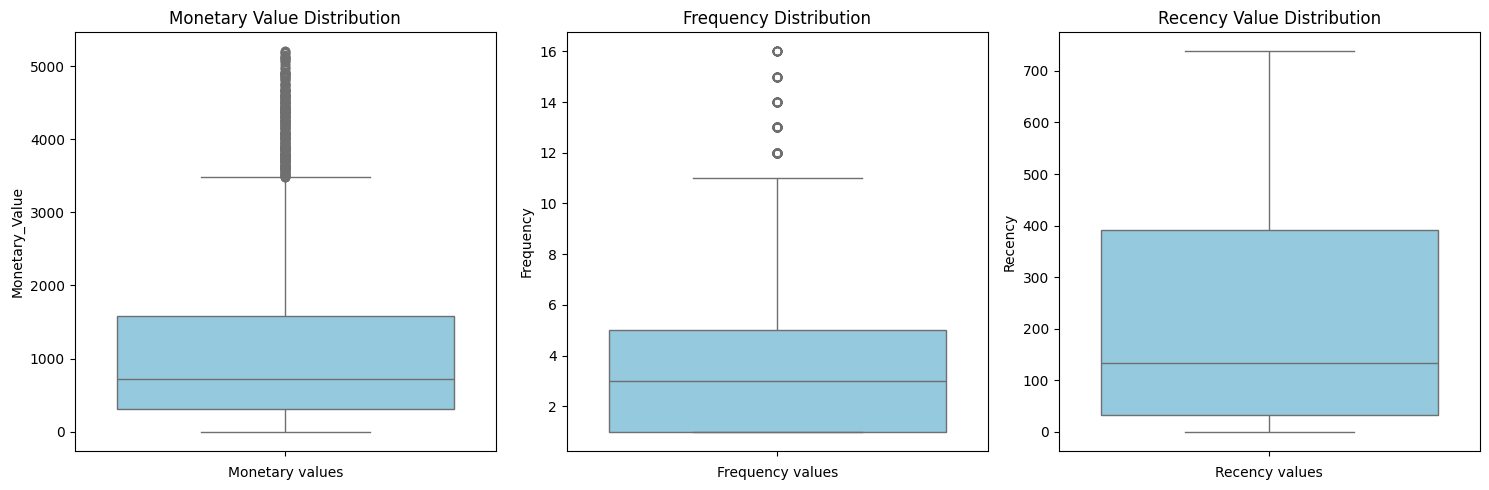

In [77]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(data=non_outliers['Monetary_Value'],color='skyblue')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary values')

plt.subplot(1,3,2)
sns.boxplot(data=non_outliers['Frequency'],color='skyblue')
plt.title('Frequency Distribution')
plt.xlabel('Frequency values')

plt.subplot(1,3,3)
sns.boxplot(data=non_outliers['Recency'],color='skyblue')
plt.title('Recency Value Distribution')
plt.xlabel('Recency values')

plt.tight_layout()
plt.show()


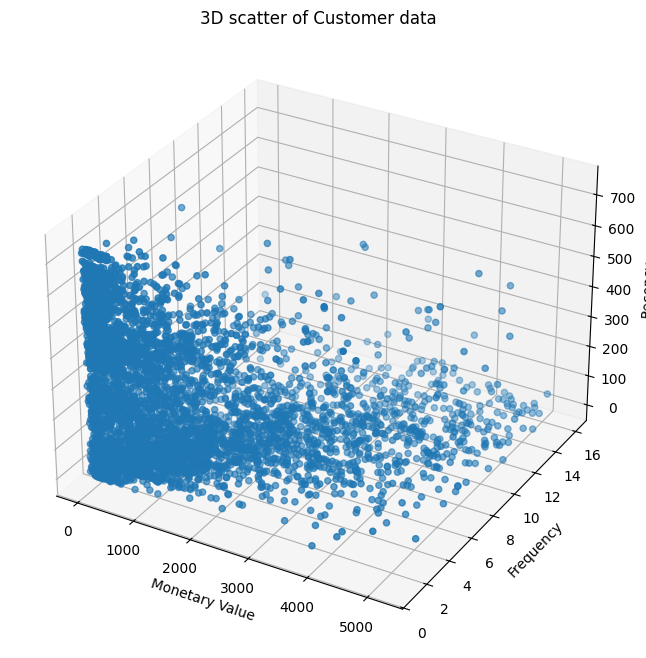

In [79]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(projection='3d')
scatter=ax.scatter(non_outliers['Monetary_Value'],non_outliers['Frequency'],non_outliers['Recency'])
ax.set_title('3D scatter of Customer data')
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.show()

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler=StandardScaler()

In [82]:
scaled_data=scaler.fit_transform(non_outliers[['Monetary_Value','Frequency','Recency']])
scaled_data

array([[ 0.46515388,  0.41043407, -0.68620646],
       [ 2.25482071, -0.21563538, -0.95148751],
       [-0.74314075, -0.84170482,  0.42702652],
       ...,
       [-0.66996983, -0.84170482,  2.08977026],
       [ 0.10021169, -0.5286701 ,  1.21813252],
       [ 2.65726077,  1.03650352, -0.83779563]], shape=(5168, 3))

In [84]:
scaled_data_df=pd.DataFrame(scaled_data,index=non_outliers.index,columns=('Monetary_Value','Frequency','Recency'))

In [85]:
scaled_data_df

,Monetary_Value,Frequency,Recency
2,0.465154,0.410434,-0.686206
3,2.254821,-0.215635,-0.951488
4,-0.743141,-0.841705,0.427027
5,-0.737356,-0.841705,0.734942
6,0.528173,1.662573,-0.870956
...,...,...,...
5847,-0.846209,-0.528670,-1.003596
5849,-0.639249,-0.841705,1.004960
5850,-0.669970,-0.841705,2.089770
5851,0.100212,-0.528670,1.218133


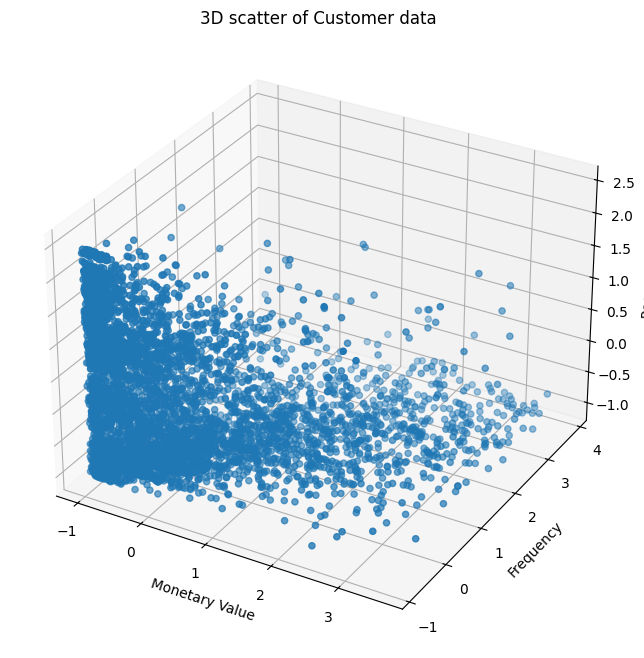

In [86]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(projection='3d')
scatter=ax.scatter(scaled_data_df['Monetary_Value'],scaled_data_df['Frequency'],scaled_data_df['Recency'])
ax.set_title('3D scatter of Customer data')
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.show()

## KMeans Clustering

In [87]:
scaled_data_df1=scaled_data_df.copy()

In [88]:
df3=scaled_data_df1.copy()

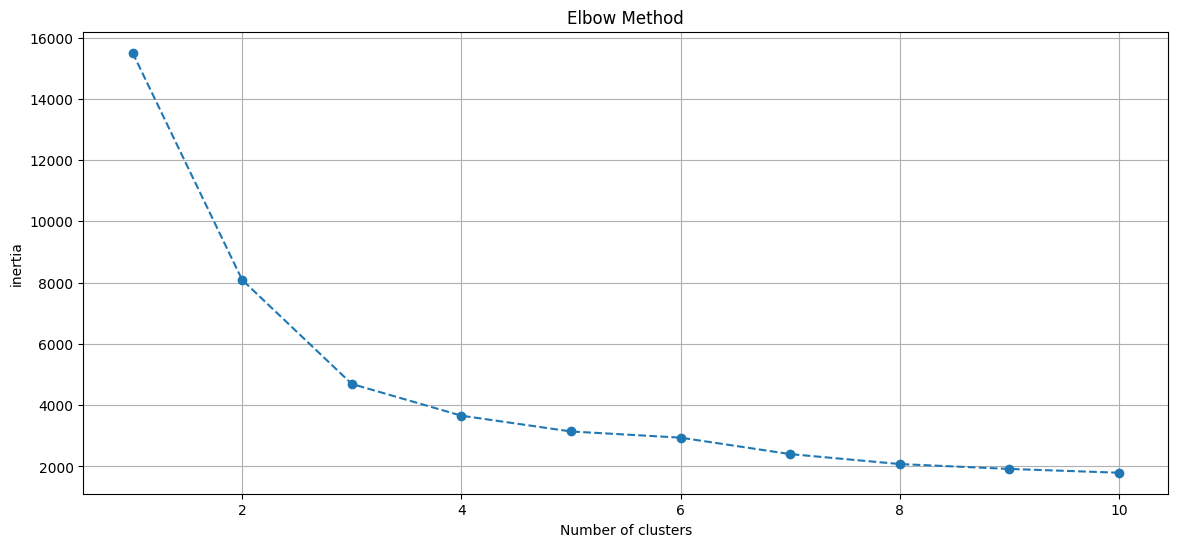

In [91]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=42,max_iter=1000)
    kmeans.fit(df3)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))
plt.plot(range(1,11),inertia,marker='o',linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.grid(True)
plt.show()
    

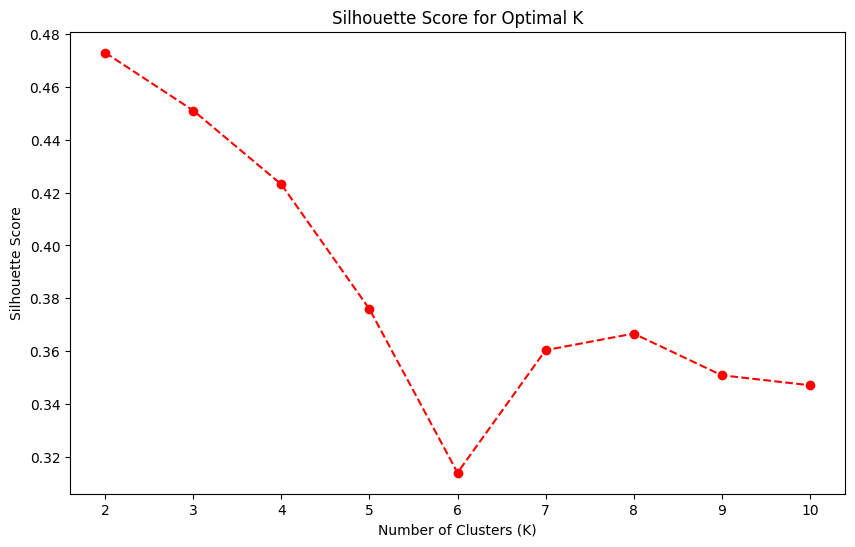

In [94]:
s_score=[]

for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=42,max_iter=1000)
    labels=kmeans.fit_predict(df3)
    score=silhouette_score(df3,labels)
    s_score.append(score)


plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), s_score, marker='o', linestyle='--', color='r')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()
    

In [95]:
kmeans=KMeans(n_clusters=4,random_state=42,max_iter=1000)
labels=kmeans.fit_predict(df3)
labels

array([2, 2, 3, ..., 3, 3, 1], shape=(5168,), dtype=int32)

In [96]:
non_outliers['clusters']=labels

C:\Users\XXXX\AppData\Local\Temp\ipykernel_30448\1620353851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers['clusters']=labels


In [101]:
non_outliers[non_outliers.clusters==3]

,Customer ID,Monetary_Value,Frequency,LastInvoicedate,Recency,clusters
4,12350.0,294.40,1,2011-02-02 16:01:00,309,3
5,12351.0,300.93,1,2010-11-29 15:23:00,374,3
19,12365.0,320.69,1,2011-02-21 13:51:00,290,3
20,12366.0,500.24,1,2010-03-16 10:28:00,633,3
22,12368.0,917.70,1,2010-03-21 15:56:00,627,3
...,...,...,...,...,...,...
5840,18275.0,741.85,2,2010-05-10 15:46:00,577,3
5844,18279.0,231.34,1,2010-07-08 14:48:00,518,3
5849,18284.0,411.68,1,2010-10-04 11:33:00,431,3
5850,18285.0,377.00,1,2010-02-17 10:24:00,660,3


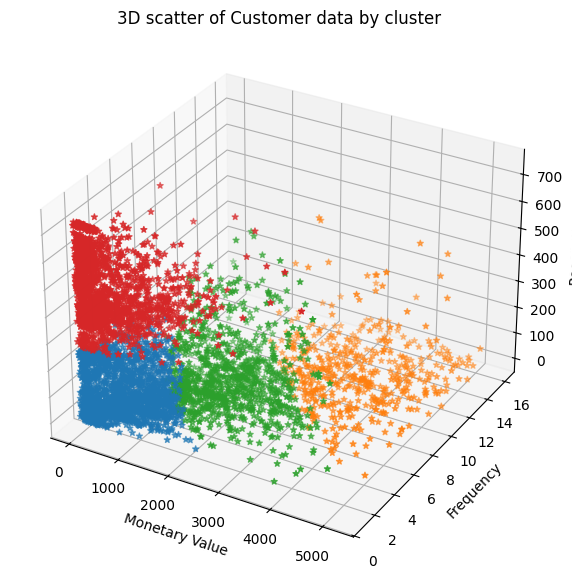

In [105]:
cluster_colors={0:'#1f77b4',
                1:'#ff7f0e',
                2:'#2ca02c',
                3:'#d62728'}
colors=non_outliers['clusters'].map(cluster_colors)

fig=plt.figure(figsize=(12,7))
ax=fig.add_subplot(projection='3d')
scatter=ax.scatter(non_outliers['Monetary_Value'],
                   non_outliers['Frequency'],
                   non_outliers['Recency'],
                   c=colors,
                   marker='*')

ax.set_title('3D scatter of Customer data by cluster')
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.show()
                  

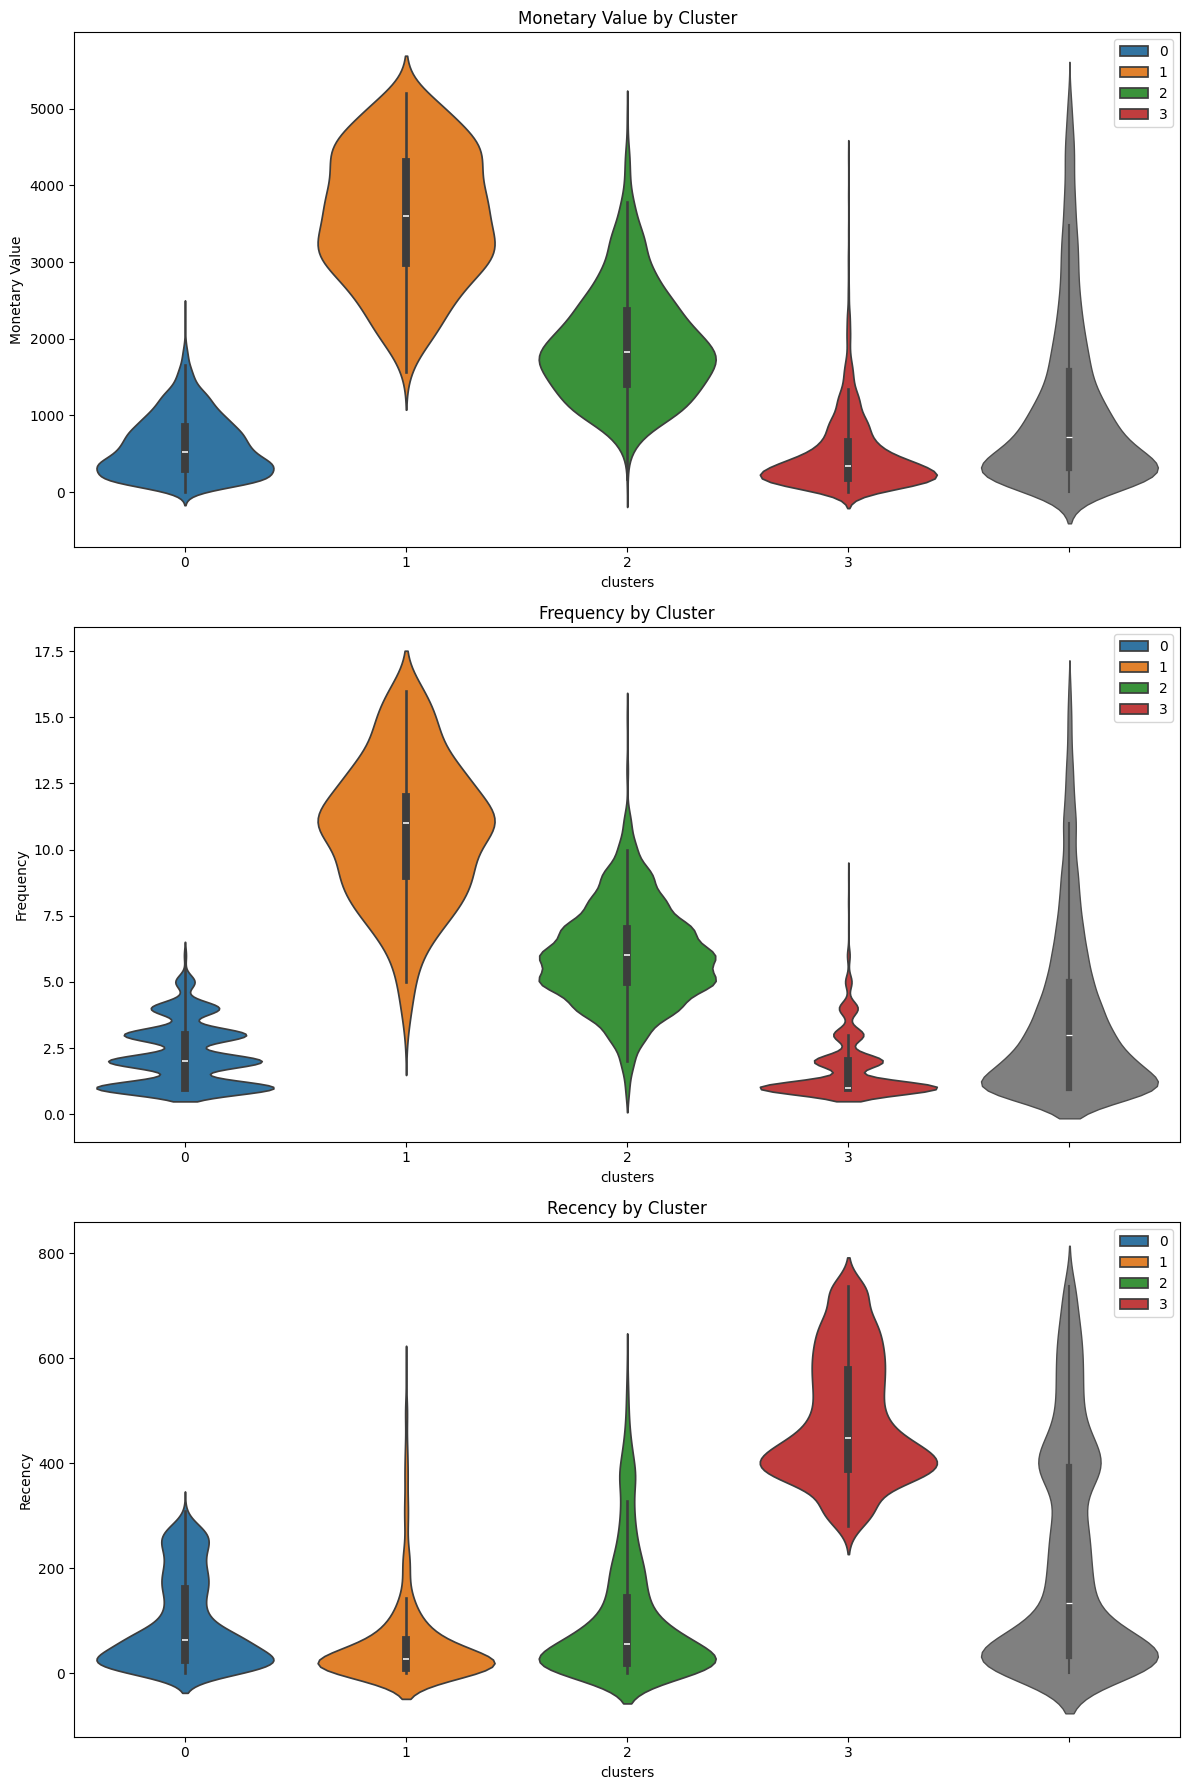

In [111]:
fig=plt.figure(figsize=(12,18))
plt.subplot(3,1,1)
sns.violinplot(x=non_outliers['clusters'],y=non_outliers['Monetary_Value'],palette=cluster_colors,hue=non_outliers['clusters'])
sns.violinplot(y=non_outliers['Monetary_Value'],color='grey',linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x=non_outliers['clusters'],y=non_outliers['Frequency'],palette=cluster_colors,hue=non_outliers['clusters'])
sns.violinplot(y=non_outliers['Frequency'],color='grey',linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=non_outliers['clusters'],y=non_outliers['Recency'],palette=cluster_colors,hue=non_outliers['clusters'])
sns.violinplot(y=non_outliers['Recency'],color='grey',linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

In [113]:
overlap_indices=monetary_outliers.index.intersection(frequency_outliers.index)
overlap_indices

Index([  67,   69,   83,   89,  122,  123,  125,  127,  133,  141,
       ...
       5683, 5737, 5763, 5788, 5790, 5791, 5794, 5796, 5810, 5825],
      dtype='int64', length=359)

In [118]:
monetary_only_outliers=monetary_outliers.drop(overlap_indices)

In [119]:
frequency_only_outliers=frequency_outliers.drop(overlap_indices)

In [123]:
monetary_and_frequency=monetary_outliers.loc[overlap_indices]

In [125]:
monetary_only_outliers['Cluster']=-1
frequency_only_outliers['Cluster']=-2
monetary_and_frequency['Cluster']=-3
outlier_clusters=pd.concat([monetary_only_outliers,frequency_only_outliers,monetary_and_frequency])

In [154]:
cluster_labels={
    0:'Retain',
    1:'Re-engage',
    2:'Nurture',
    3:'Reward'
}

In [155]:
non_outliers['ClusterLabels']=non_outliers['clusters'].map(cluster_labels)

C:\Users\XXXX\AppData\Local\Temp\ipykernel_30448\1020813373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers['ClusterLabels']=non_outliers['clusters'].map(cluster_labels)


In [156]:
non_outliers.head()

,Customer ID,Monetary_Value,Frequency,LastInvoicedate,Recency,clusters,ClusterLabels
2,12348.0,1658.40,5,2011-09-25 13:13:00,74,2,Nurture
3,12349.0,3678.69,3,2011-11-21 09:51:00,18,2,Nurture
4,12350.0,294.40,1,2011-02-02 16:01:00,309,3,Reward
5,12351.0,300.93,1,2010-11-29 15:23:00,374,3,Reward
6,12352.0,1729.54,9,2011-11-03 14:37:00,35,2,Nurture


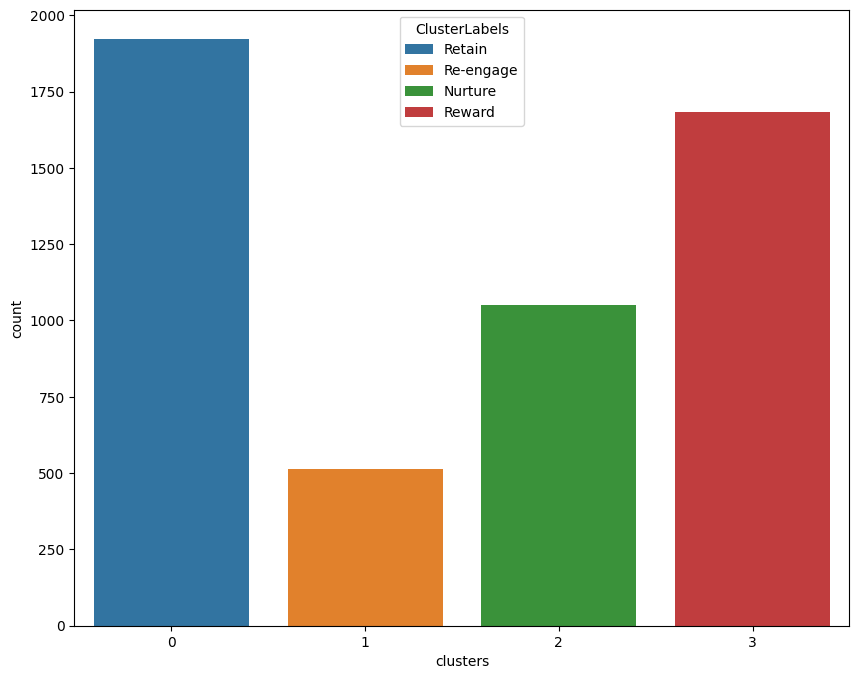

In [158]:
plt.figure(figsize=(10,8))
sns.countplot(x=non_outliers['clusters'],hue=non_outliers['ClusterLabels'])
plt.show()